# Decision Tree Algorithm

# Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

In [39]:
# Load libraries
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

print(os.environ["PATH"])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0\;C:\windows\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn\;C:\Program Files (x86)\Microsoft SQL Server\150\Tools\Binn\;C:\Program Files\Microsoft SQL Server\150\Tools\Binn\;C:\Program Files\Microsoft SQL Server\150\DTS\Binn\;C:\Program Files (x86)\Microsoft SQL Server\150\DTS\Binn\;C:\Program Files\Azure Data Studio\bin;C:\Users\Hp\AppData\Local\Programs\Python\Python38-32\Scripts\;C:\Users\Hp\AppData\Local\Programs\Python\Python38-32\;C:\Users\Hp\AppData\Local\Microsoft\WindowsApps;;C:\Program Files\Azure Data Studio\bin;C:\Program Files\Azure Data Studio\bin;C:\Program Files\Graphviz;C:\Program Files\Graphvizin;C:\Program Files\Graphvizin;C

In [38]:
# load dataset
pima = pd.read_csv("C:\\Users\\Hp\\Downloads\\diabetes.csv")

col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
pima.columns= col_names

In [47]:
# Check the shape of data sets
pima.shape

(768, 9)

In [18]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features (Predictor Variables)
y = pima.Outcome # Target variable

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
print('Input Data Shape :', pima.shape)
print('Predictor Variables Shape :', X.shape)
print('Target Variables Shape :', y.shape)
print('X_Train  Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape :', X_test.shape)
print('y_test Shape :', y_test.shape)

Input Data Shape : (768, 9)
Predictor Variables Shape : (768, 7)
Target Variables Shape : (768,)
X_Train  Shape : (537, 7)
y_train Shape : (537,)
X_test Shape : (231, 7)
y_test Shape : (231,)


In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [23]:
X_test.head(3)

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206


In [24]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
y_pred[:3]

array([0, 0, 0], dtype=int64)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz


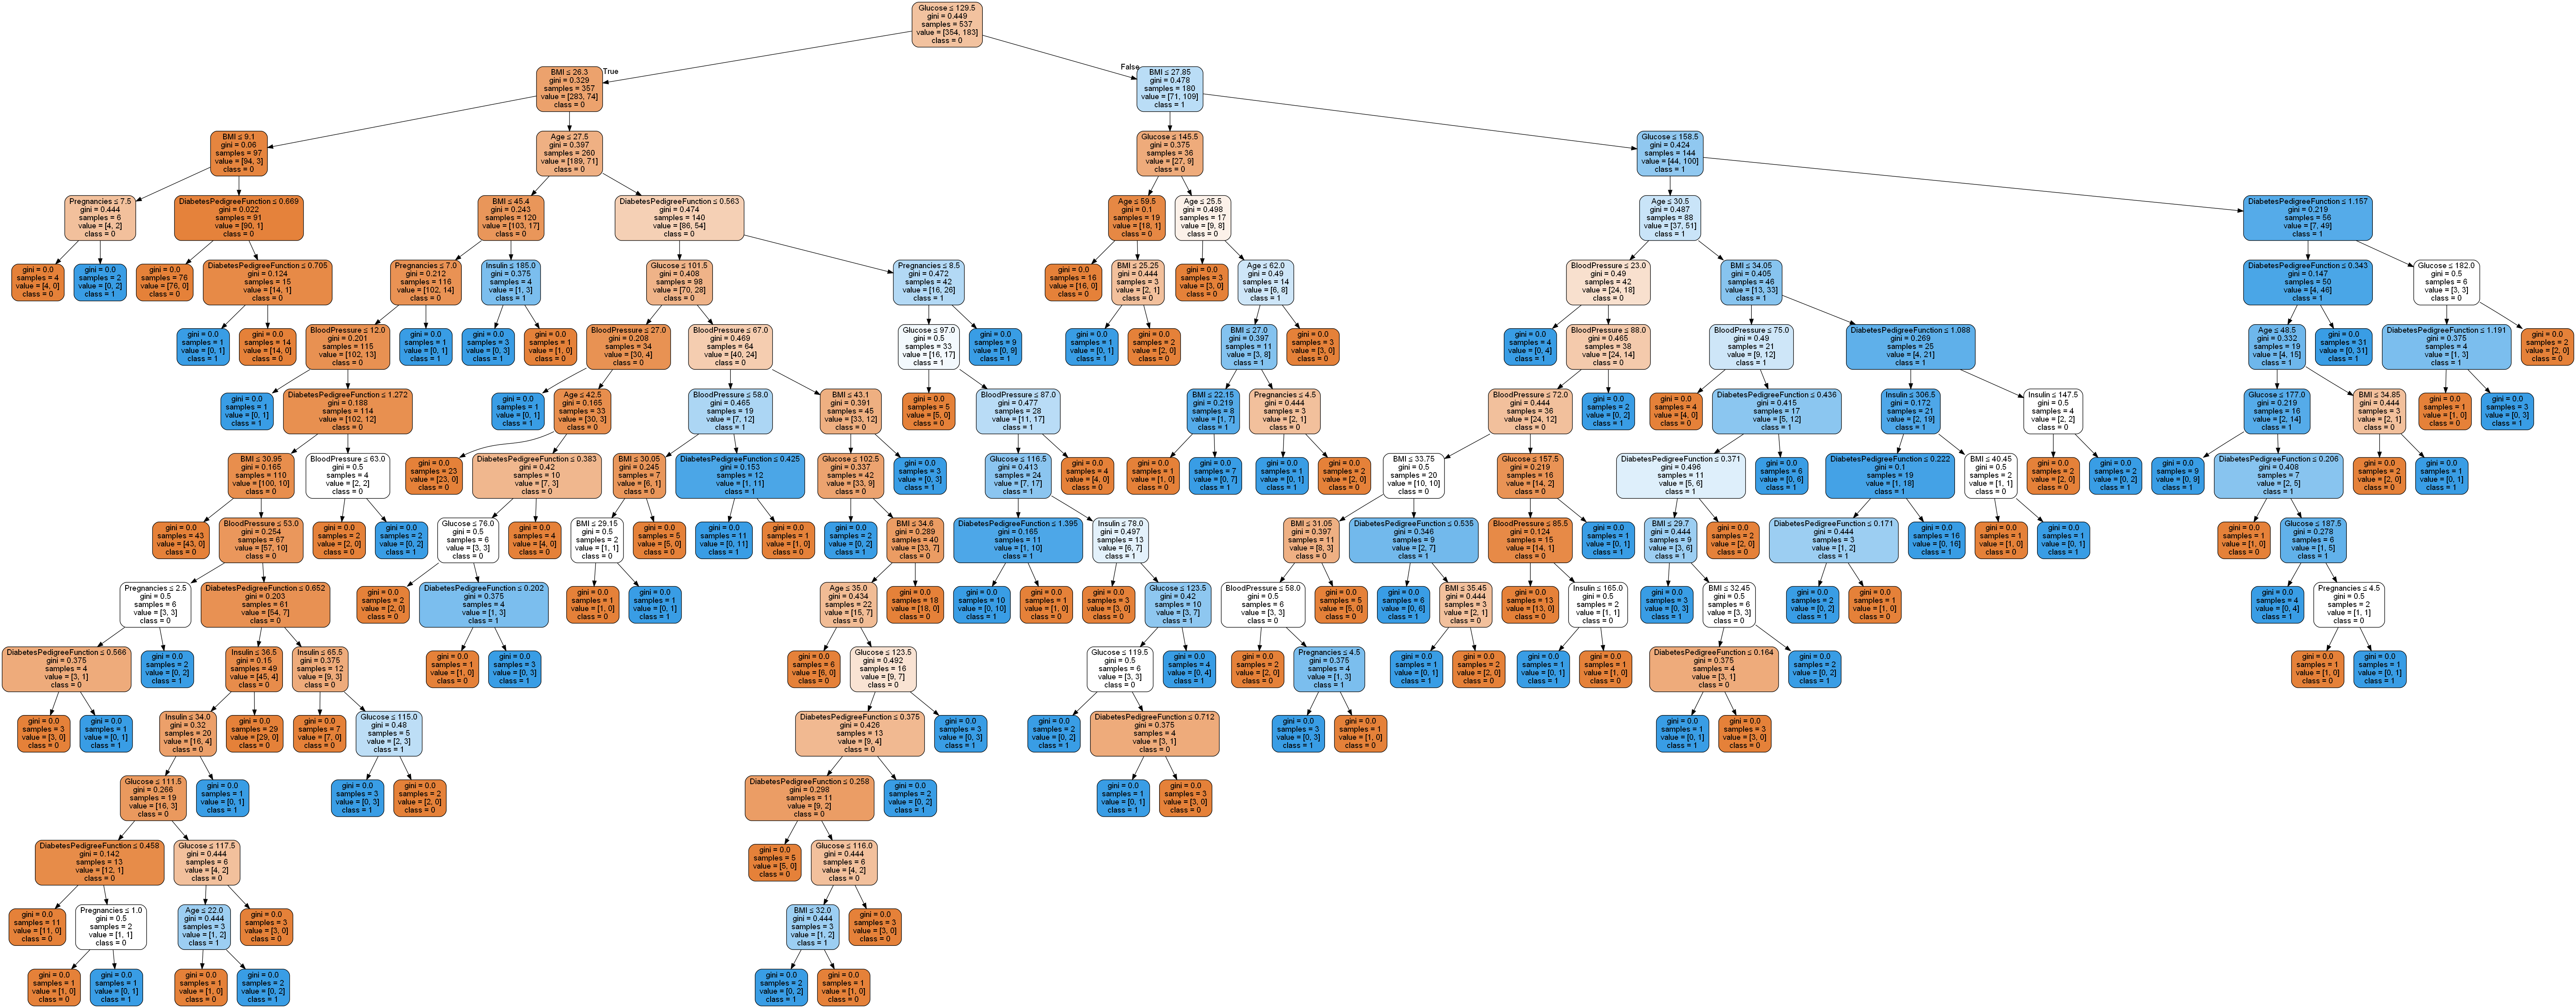

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())




In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


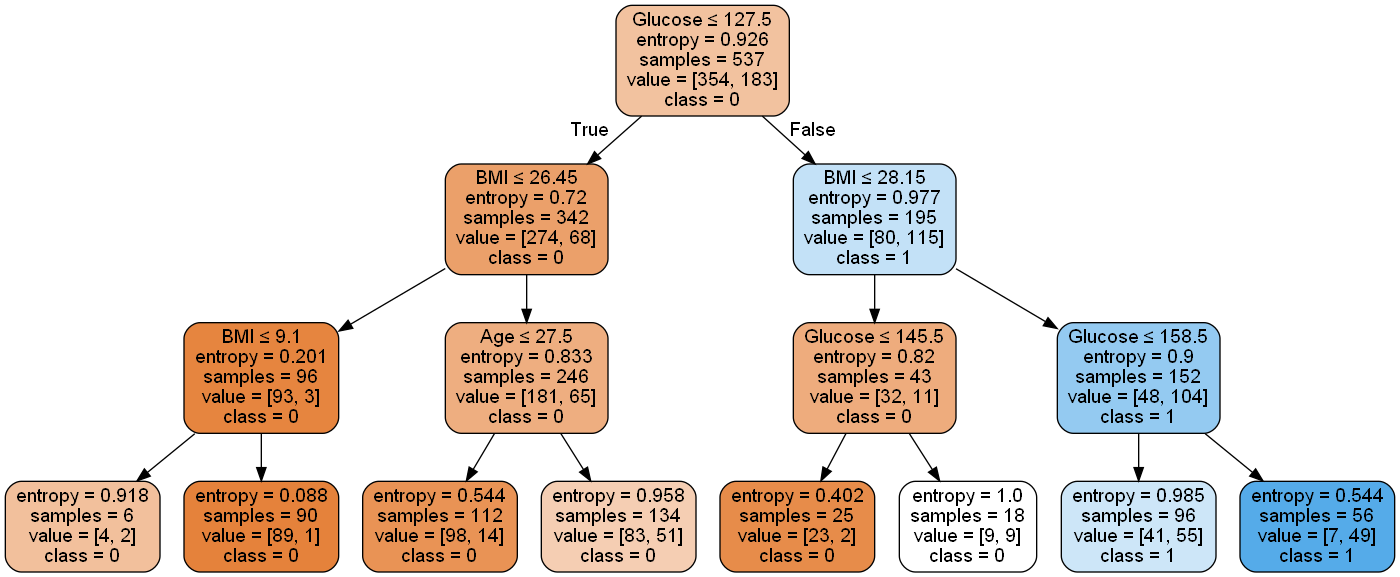

In [44]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())